In [2]:
# Set up environment

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import zipfile

#zf = zipfile.ZipFile('https://github.com/awesomedata/awesome-public-datasets/blob/master/Datasets/titanic.csv.zip')

#sales = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/sales_data_sample12.4.19.csv", encoding= 'ISO-8859-1')

sales = pd.read_csv("https://data.cms.gov/sites/default/files/2023-10/c39a5649-1396-483a-81c5-81bc00a887f8/Medicare%20Monthly%20Enrollment%20Data_July%202023.csv" , encoding= 'ISO-8859-1')

# Convert column headers to lower case for ease of coding
sales.columns = sales.columns.str.lower()

print(sales.shape)


sales.info()
sales.head()



(456954, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456954 entries, 0 to 456953
Data columns (total 26 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   year                                          456954 non-null  int64 
 1   month                                         456954 non-null  object
 2   bene_geo_lvl                                  456954 non-null  object
 3   bene_state_abrvtn                             456954 non-null  object
 4   bene_state_desc                               456954 non-null  object
 5   bene_county_desc                              456954 non-null  object
 6   bene_fips_cd                                  456954 non-null  object
 7   tot_benes                                     456954 non-null  object
 8   orgnl_mdcr_benes                              456954 non-null  object
 9   ma_and_oth_benes                              

,year,month,bene_geo_lvl,bene_state_abrvtn,bene_state_desc,bene_county_desc,bene_fips_cd,tot_benes,orgnl_mdcr_benes,ma_and_oth_benes,...,a_b_tot_benes,a_b_orgnl_mdcr_benes,a_b_ma_and_oth_benes,prscrptn_drug_tot_benes,prscrptn_drug_pdp_benes,prscrptn_drug_mapd_benes,prscrptn_drug_deemed_eligible_full_lis_benes,prscrptn_drug_full_lis_benes,prscrptn_drug_partial_lis_benes,prscrptn_drug_no_lis_benes
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,...,47620905,32831884,14789022,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
1,2013,Year,State,AL,Alabama,Total,01,921477.0,711448.0,210029.0,...,857619.0,647647.0,209972.0,637247.0,437749.0,199498.0,205496.0,32790.0,11452.0,387510.0
2,2013,Year,County,AL,Alabama,Autauga,01001,9323.0,6484.0,2840.0,...,8708.0,5868.0,2840.0,6036.0,3268.0,2767.0,1839.0,296.0,105.0,3796.0
3,2013,Year,County,AL,Alabama,Baldwin,01003,41033.0,28775.0,12258.0,...,38559.0,26304.0,12255.0,27352.0,15593.0,11759.0,5276.0,867.0,379.0,20830.0
4,2013,Year,County,AL,Alabama,Barbour,01005,5847.0,5036.0,810.0,...,5456.0,4645.0,810.0,4170.0,3410.0,759.0,1783.0,304.0,73.0,2009.0


In [3]:
# Count records by country

print(sales[['make']].groupby(sales['state']).agg(['count']))

KeyError: ignored

In [4]:
# Count records by country

print(sales[['state']].groupby(sales['make']).agg(['count']))

KeyError: ignored

In [ ]:
# Split up your dataset
wa_sales = sales[(sales['state'] == 'WA')]

print(wa_sales.info())
wa_sales.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 153491 entries, 0 to 153829
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   vin (1-10)                                         153491 non-null  object 
 1   county                                             153491 non-null  object 
 2   city                                               153491 non-null  object 
 3   state                                              153491 non-null  object 
 4   postal code                                        153491 non-null  float64
 5   model year                                         153491 non-null  int64  
 6   make                                               153491 non-null  object 
 7   model                                              153491 non-null  object 
 8   electric vehicle type                              153491 non-null  object

,vin (1-10),county,city,state,postal code,model year,make,model,electric vehicle type,clean alternative fuel vehicle (cafv) eligibility,electric range,base msrp,legislative district,dol vehicle id,vehicle location,electric utility,2020 census tract
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
2,5YJSA1E24G,King,Seattle,WA,98103.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1N4AZ1CP5J,King,Shoreline,WA,98177.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10
5,1G1FW6S00H,Kitsap,Seabeck,WA,98380.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,35.0,125032974,POINT (-122.847462 47.63836),PUGET SOUND ENERGY INC,5.303509e+10


In [ ]:
non_wa_sales = sales[(sales['state'] != 'WA')]
print(non_wa_sales.info())
non_wa_sales.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 1 to 153487
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   vin (1-10)                                         339 non-null    object 
 1   county                                             336 non-null    object 
 2   city                                               336 non-null    object 
 3   state                                              339 non-null    object 
 4   postal code                                        336 non-null    float64
 5   model year                                         339 non-null    int64  
 6   make                                               339 non-null    object 
 7   model                                              339 non-null    object 
 8   electric vehicle type                              339 non-null    object 
 9   clean a

,vin (1-10),county,city,state,postal code,model year,make,model,electric vehicle type,clean alternative fuel vehicle (cafv) eligibility,electric range,base msrp,legislative district,dol vehicle id,vehicle location,electric utility,2020 census tract
1,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN
48,5YJSA1E2XH,Allen,Fort Wayne,IN,46802.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,NaN,349703826,POINT (-85.140945 41.07697),NON WASHINGTON STATE ELECTRIC UTILITY,1.800300e+10
18767,5YJ3E1EC4L,Rockingham,Portsmouth,NH,3804.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,NaN,8798226,POINT (-70.873801 42.8822726),NON WASHINGTON STATE ELECTRIC UTILITY,3.301507e+10
19249,7SAYGDEE8N,Stafford,Stafford,VA,22554.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,223816197,POINT (-77.410205 38.42543),NON WASHINGTON STATE ELECTRIC UTILITY,5.117901e+10
20879,5YJ3E1EB5J,Harnett,Spring Lake,NC,28390.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,326216985,POINT (-78.9769553 35.1704689),NON WASHINGTON STATE ELECTRIC UTILITY,3.708507e+10


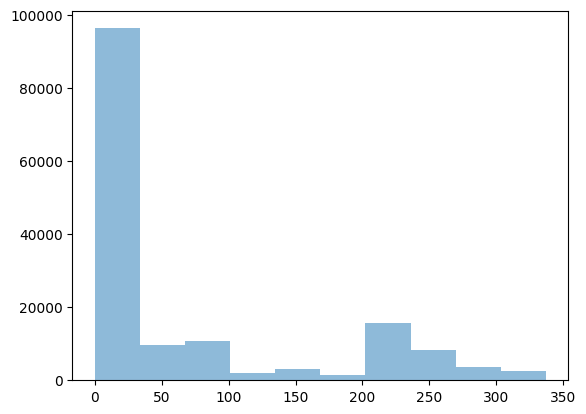

DescribeResult(nobs=153491, minmax=(0, 337), mean=65.7161853137969, variance=9052.463151871947, skewness=1.2718459748954989, kurtosis=0.10850541331808028)
DescribeResult(nobs=339, minmax=(0, 330), mean=70.929203539823, variance=9293.320416819395, skewness=1.2302152197014877, kurtosis=0.012572386707935923)


In [ ]:
# Plot the histogram

plt.hist(wa_sales['electric range'], alpha = .5)
plt.hist(non_wa_sales['electric range'], alpha = .5)
plt.show()

print(stats.describe(wa_sales['electric range']))
print(stats.describe(non_wa_sales['electric range']))

In [ ]:
# Conduct the t-test

stats.ttest_ind(wa_sales['electric range'], non_wa_sales['electric range'])

TtestResult(statistic=-1.0076598460534139, pvalue=0.3136193729275851, df=153828.0)

In [ ]:
# Confidence interval


def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(wa_sales['electric range'], non_wa_sales['electric range']))

# What is the current average sales in these countries?

print(non_wa_sales["electric range"].mean())


The difference in means at the 95% confidence interval (two-tail) is between -5.060243142326383 and 15.4862795943786.
70.929203539823
